### Prediction using Decision Tree Algorithm

#### Author: Thilagavathy R Vasantharaja

### 1.Importing Libraries

In [92]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree

### 2.Loading the iris dataset

In [93]:
iris=datasets.load_iris()

In [94]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 3.Forming the iris dataframe

In [95]:
df = pd.DataFrame(iris['data'], columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
y=pd.DataFrame(iris['target'], columns = ["Target_Species"])
y.head()

,Target_Species
0,0
1,0
2,0
3,0
4,0


In [97]:
df.shape

(150, 4)

In [98]:
y.shape

(150, 1)

In [99]:
df.columns.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

#### Checking is there exists null values in the dataset or not

In [100]:
df[df.isnull().any(axis=1)].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


### 4.Defining the decision tree algorithm

In [101]:
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### 5.Visualizing the Decision Tree to understand it better

In [102]:
n_nodes = dtree.tree_.node_count
children_left = dtree.tree_.children_left
children_right = dtree.tree_.children_right
feature = dtree.tree_.feature
threshold = dtree.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))



The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 2] <= 2.449999988079071 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.75 else to node 12.
		node=3 is a split node: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 7.
			node=4 is a split node: go to node 5 if X[:, 3] <= 1.6500000357627869 else to node 6.
				node=5 is a leaf node.
				node=6 is a leaf node.
			node=7 is a split node: go to node 8 if X[:, 3] <= 1.550000011920929 else to node 9.
				node=8 is a leaf node.
				node=9 is a split node: go to node 10 if X[:, 2] <= 5.450000047683716 else to node 11.
					node=10 is a leaf node.
					node=11 is a leaf node.
		node=12 is a split node: go to node 13 if X[:, 2] <= 4.8500001430511475 else to node 16.
			node=13 is a split node: go to node 14 if X[:, 1] <= 3.100000023841858 else to node 15.
				node=14 is a leaf node.
				node=15 is a leaf node.
			node

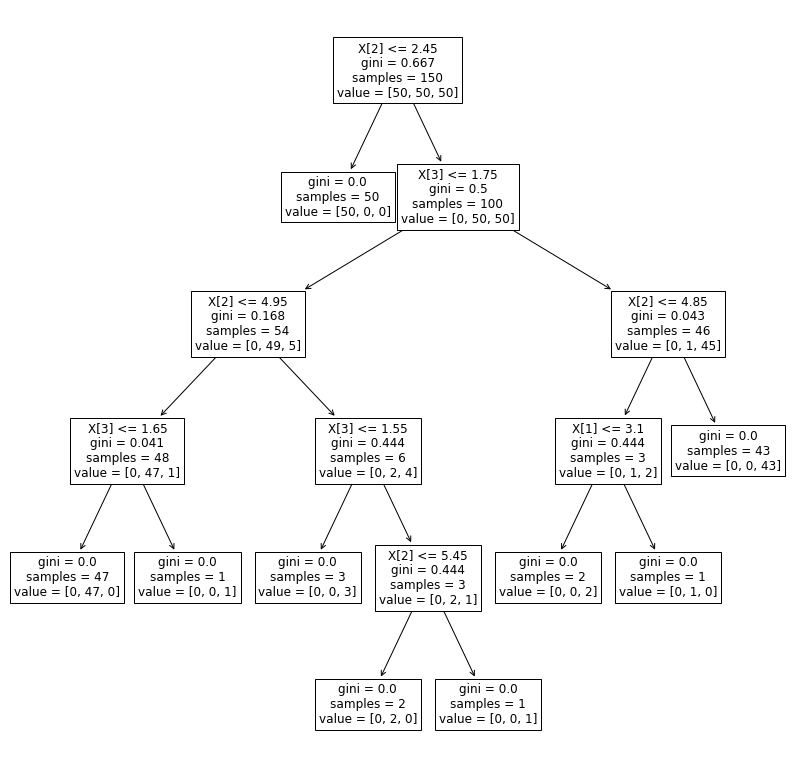

In [103]:
plt.figure(figsize=(14,14))  # set plot size (denoted in inches)
tree.plot_tree(dtree,fontsize=12)
plt.show()

### 6.Test result prediction

In [104]:
X_new = np.array([[5.8,2.7,4.1,1], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [105]:
prediction = dtree.predict(X_new)
prediction
#print("Prediction of Species: {}".format(prediction))

array([1, 0])